# Training data size vs Model Accuracy

A stratified data sample is required for the study. This sample would be provided by the robo advisory firm. Here arises a question of size; what is the optimal size of data that can be provided without compromising results of this study? 

To find this out different sizes of data samples were taken and checked on how accurately these models can perform on those. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

##### Importing the balanced stratified dataset

In [2]:
df_stratified = pd.read_csv("poly_stratified_sample_27nov2019.csv")
df_stratified.drop(df_stratified.columns[df_stratified.columns.str.contains('unnamed',case=False)],axis=1,inplace=True)
df_stratified.head()

,Age,Dependents,Annual_income,Monthly_loans,Income_stability,Portfolio_status,Investment_obj,Duration_inv,Comfort,Behaviour,output,categories
0,0.2,0.6,0.4,0.4,0.3,0.4,1.0,0.50,0.2,0.2,1.122540,1.0
1,1.0,0.8,1.0,1.0,0.3,0.4,0.4,0.60,0.1,0.3,3.704280,4.0
2,1.0,0.6,1.0,0.2,0.1,0.6,0.4,0.65,0.9,0.2,3.220670,3.0
3,0.5,0.1,0.2,0.6,0.6,0.4,0.5,0.65,0.2,0.2,1.117035,1.0
4,1.0,0.6,0.4,0.6,0.1,0.4,0.5,0.80,1.0,0.9,3.033080,3.0


In [3]:
df_stratified.drop(columns=['output'],inplace=True)
X = df_stratified.drop(columns=['categories'])
Y = df_stratified['categories']

##### importing models

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 

In [5]:
models = []
models.append(("LR",LogisticRegression(penalty='l2',solver = 'lbfgs')))
models.append(("GNB",GaussianNB()))
models.append(("DTREE",DecisionTreeClassifier(max_depth = 18)))
models.append(("KNN",KNeighborsClassifier(n_neighbors = 10)))
models.append(("SVM",SVC(kernel = 'poly', C = 1,probability=True)))

##### Our test sizes for division of data

In [6]:
test_size_n = [0.98,0.95,0.90,0.80,0.75,0.66,0.60]
X_train = {}
X_test ={}
Y_train ={}
Y_test = {}
model_fits= {}

##### Storing the different data sets

In [7]:
for i in range(len(test_size_n)):
    X_train[i] , X_test[i], Y_train[i], Y_test[i] = train_test_split(X,Y,test_size = test_size_n[i],random_state=42,stratify=Y)

##### Steps shown seperately for ease of understanding

## Trained on 2% of data

In [8]:
print("Training Size: ",len(X_train[0]),",Test Size: ",len(X_test[0]))

Training Size:  22500 ,Test Size:  1102500


In [9]:
model_fit=[]
model_preds={}
model_preds[0]=[]
for name,model in models:
    model_fit.append(model.fit(X_train[0],Y_train[0]))
    model_preds[0].append(model.predict(X_test[0]))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Trained on 5% of data

In [10]:
print("Training Size: ",len(X_train[1]),",Test Size: ",len(X_test[1]))

Training Size:  56250 ,Test Size:  1068750


In [11]:
model_preds[1] = []
for name,model in models:
    model_fit.append(model.fit(X_train[1],Y_train[1]))
    model_preds[1].append(model.predict(X_test[1]))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Trained on 10% of the data

In [12]:
print("Training Size: ",len(X_train[2]),",Test Size: ",len(X_test[2]))

Training Size:  112500 ,Test Size:  1012500


In [13]:
model_preds[2]=[]
for name,model in models:
    model_fit.append(model.fit(X_train[2],Y_train[2]))
    model_preds[2].append(model.predict(X_test[2]))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Trained on 20% of the data

In [14]:
print("Training Size: ",len(X_train[3]),",Test Size: ",len(X_test[3]))

Training Size:  225000 ,Test Size:  900000


In [15]:
model_preds[3]=[]
for name,model in models:
    model_fit.append(model.fit(X_train[3],Y_train[3]))
    model_preds[3].append(model.predict(X_test[3]))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Trained on 25% of data

In [16]:
print("Training Size: ",len(X_train[4]),",Test Size: ",len(X_test[4]))

Training Size:  281250 ,Test Size:  843750


In [17]:
model_preds[4]=[]
for name,model in models:
    model_fit.append(model.fit(X_train[4],Y_train[4]))
    model_preds[4].append(model.predict(X_test[4]))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Trained on 33% of data

In [18]:
print("Training Size: ",len(X_train[5]),",Test Size: ",len(X_test[5]))

Training Size:  382500 ,Test Size:  742500


In [19]:
model_preds[5]=[]
for name,model in models:
    model_fit.append(model.fit(X_train[5],Y_train[5]))
    model_preds[5].append(model.predict(X_test[5]))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Trained on 40% of the data

In [20]:
print("Training Size: ",len(X_train[5]),",Test Size: ",len(X_test[5]))

Training Size:  382500 ,Test Size:  742500


In [21]:
model_preds[6]=[]
for name,model in models:
    model_fit.append(model.fit(X_train[6],Y_train[6]))
    model_preds[6].append(model.predict(X_test[6]))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
model_preds[0]

[array([3., 3., 1., ..., 2., 1., 2.]),
 array([2., 2., 1., ..., 2., 1., 2.]),
 array([3., 3., 1., ..., 3., 1., 2.]),
 array([3., 3., 1., ..., 2., 1., 2.]),
 array([3., 3., 1., ..., 2., 1., 2.])]

## Plotting Accuracy vs Training Size

##### Calculating accuracy and F1-Score

In [23]:
LR_f1=[]
LR_acc=[]
GNB_f1=[]
GNB_acc=[]
DTREE_f1=[]
DTREE_acc=[]
KNN_f1=[]
KNN_acc=[]
SVM_f1=[]
SVM_acc=[]
#LR.append(metrics.f1_score(Y_test[1],model_preds[1][0],average="macro"))
for i in range(len(model_preds)):
    LR_f1.append(metrics.f1_score(Y_test[i],model_preds[i][0],average="macro"))
    LR_acc.append(metrics.accuracy_score(Y_test[i],model_preds[i][0]))
for i in range(len(model_preds)):
    GNB_f1.append(metrics.f1_score(Y_test[i],model_preds[i][1],average="macro"))
    GNB_acc.append(metrics.accuracy_score(Y_test[i],model_preds[i][1]))
for i in range(len(model_preds)):
    DTREE_f1.append(metrics.f1_score(Y_test[i],model_preds[i][2],average="macro"))
    DTREE_acc.append(metrics.accuracy_score(Y_test[i],model_preds[i][2]))
for i in range(len(model_preds)):
    KNN_f1.append(metrics.f1_score(Y_test[i],model_preds[i][3],average="macro"))
    KNN_acc.append(metrics.accuracy_score(Y_test[i],model_preds[i][3]))
for i in range(len(model_preds)):
    SVM_f1.append(metrics.f1_score(Y_test[i],model_preds[i][4],average="macro"))
    SVM_acc.append(metrics.accuracy_score(Y_test[i],model_preds[i][4]))

### F1 Score 

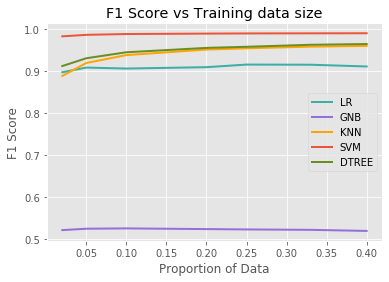

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.plot([0.02,0.05,0.10,0.20,0.25,0.33,0.4],LR_f1,color="#3CAEA3",label="LR",linewidth=2)
plt.plot([0.02,0.05,0.10,0.20,0.25,0.33,0.4],GNB_f1,color="mediumpurple",label="GNB",linewidth=2)
plt.plot([0.02,0.05,0.10,0.20,0.25,0.33,0.4],KNN_f1,color="orange",label="KNN",linewidth=2)
plt.plot([0.02,0.05,0.10,0.20,0.25,0.33,0.4],SVM_f1,color="#ED553B",label="SVM",linewidth=2)
plt.plot([0.02,0.05,0.10,0.20,0.25,0.33,0.4],DTREE_f1,color="olivedrab",label="DTREE",linewidth=2)
plt.title("F1 Score vs Training data size")
plt.xlabel("Proportion of Data")
plt.ylabel("F1 Score")
plt.legend()

### Accuracy

Text(0.5, 1.0, 'Accuracy vs Training data size')

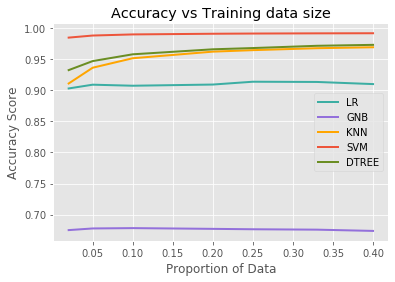

In [49]:
plt.plot([0.02,0.05,0.10,0.20,0.25,0.33,0.4],LR_acc,color="#3CAEA3",label="LR",linewidth=2)
plt.plot([0.02,0.05,0.10,0.20,0.25,0.33,0.4],GNB_acc,color="mediumpurple",label="GNB",linewidth=2)
plt.plot([0.02,0.05,0.10,0.20,0.25,0.33,0.4],KNN_acc,color="orange",label="KNN",linewidth=2)
plt.plot([0.02,0.05,0.10,0.20,0.25,0.33,0.4],SVM_acc,color="#ED553B",label="SVM",linewidth=2)
plt.plot([0.02,0.05,0.10,0.20,0.25,0.33,0.4],DTREE_acc,color="olivedrab",label="DTREE",linewidth=2)
plt.xlabel("Proportion of Data")
plt.ylabel("Accuracy Score")
plt.legend()
plt.title("Accuracy vs Training data size")